# Descriptives (using the csv file) - Cars - Final

In [1]:
import json
import pandas as pd
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#get the csv

In [3]:
df_clean_data = pd.read_csv(r'C:\Users\Maren\Desktop\TechLabs\hh_techlabs_group12\hh_techlabs_group12\clean_data_cars.csv')

In [4]:
df_clean_data

,@iot.id,phenomenonDate,result,id,lat,long,weekday
0,217458630,2021-08-12,17110,15856,53.601892,10.069361,Thursday
1,216650941,2021-08-11,16989,15856,53.601892,10.069361,Wednesday
2,219332631,2021-08-13,16877,15856,53.601892,10.069361,Friday
3,224072517,2021-08-16,15661,15856,53.601892,10.069361,Monday
4,220958460,2021-08-14,13726,15856,53.601892,10.069361,Saturday
...,...,...,...,...,...,...,...
117221,207525735,2021-07-31,10857,14688,53.628615,9.931821,Saturday
117222,208619598,2021-08-01,9543,14688,53.628615,9.931821,Sunday
117223,210252373,2021-08-02,12355,14688,53.628615,9.931821,Monday
117224,211952348,2021-08-03,12453,14688,53.628615,9.931821,Tuesday


In [5]:
df_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117226 entries, 0 to 117225
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   @iot.id         117226 non-null  int64  
 1   phenomenonDate  117226 non-null  object 
 2   result          117226 non-null  int64  
 3   id              117226 non-null  int64  
 4   lat             117226 non-null  float64
 5   long            117226 non-null  float64
 6   weekday         117226 non-null  object 
dtypes: float64(2), int64(3), object(2)
memory usage: 6.3+ MB


In [6]:
df_clean_data.dtypes

@iot.id             int64
phenomenonDate     object
result              int64
id                  int64
lat               float64
long              float64
weekday            object
dtype: object

In [7]:
#  I would like to change phenomenonDate back to the format datetime64 (this got lost when saving the file as csv)

In [8]:
df_clean_data=df_clean_data.astype({'phenomenonDate': 'datetime64'})

In [9]:
df_clean_data.dtypes

@iot.id                    int64
phenomenonDate    datetime64[ns]
result                     int64
id                         int64
lat                      float64
long                     float64
weekday                   object
dtype: object

In [10]:
#min/max values

df_clean_data.max()

@iot.id                     243101194
phenomenonDate    2021-08-27 00:00:00
result                          65928
id                              16176
lat                           53.6808
long                          10.2165
weekday                     Wednesday
dtype: object

In [11]:
df_clean_data.min()

@iot.id                      51216915
phenomenonDate    2020-11-01 00:00:00
result                              0
id                              12904
lat                           53.4196
long                          9.73555
weekday                        Friday
dtype: object

In [12]:
df_clean_data.loc[df_clean_data["result"]==0]

,@iot.id,phenomenonDate,result,id,lat,long,weekday
38329,57532591,2021-02-21,0,14648,53.583577,9.984033,Sunday
38335,58820174,2021-02-27,0,14648,53.583577,9.984033,Saturday
38337,59230729,2021-03-01,0,14648,53.583577,9.984033,Monday
54765,51839773,2020-12-01,0,14836,53.598878,9.991415,Tuesday
54767,51840064,2020-11-01,0,14836,53.598878,9.991415,Sunday
...,...,...,...,...,...,...,...
115993,160576364,2021-06-24,0,14680,53.547992,10.106112,Thursday
115994,160878255,2021-06-25,0,14680,53.547992,10.106112,Friday
115995,161095921,2021-06-26,0,14680,53.547992,10.106112,Saturday
115996,161309858,2021-06-27,0,14680,53.547992,10.106112,Sunday


In [13]:
#drop all observations which have 0 as result
df_clean_data=df_clean_data[df_clean_data.result!=0]

In [14]:
### --> range of dates: From 2020-11-01 to 2021-08-27 the vehicles are counted
# to have the same dates for bikes and cars --> keep observations until 13.08.






In [15]:
# How many Zählstellen are measuring every day? 

## pivot: count numbers of Zählstellen("id") per phenomenondate
CountZaehlstelle = df_clean_data.pivot_table(values = "id", index = "phenomenonDate", aggfunc= "count")
CountZaehlstelle

,id
phenomenonDate,
2020-11-01,382
2020-11-02,382
2020-11-03,383
2020-11-04,383
2020-11-05,391
...,...
2021-08-23,427
2021-08-24,425
2021-08-25,425


<AxesSubplot:xlabel='phenomenonDate', ylabel='id'>

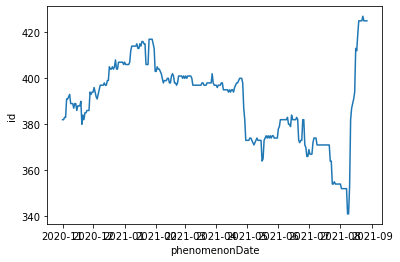

In [16]:
sns.lineplot(data=CountZaehlstelle, x = "phenomenonDate", y = "id")

In [17]:
# Combined number of cars measured each individual day
SumCars = df_clean_data.pivot_table(values = "result", index = "phenomenonDate", aggfunc = "sum")
SumCars

,result
phenomenonDate,
2020-11-01,2820704
2020-11-02,4760034
2020-11-03,4882732
2020-11-04,4844709
2020-11-05,4866584
...,...
2021-08-23,5891940
2021-08-24,6023235
2021-08-25,5973315


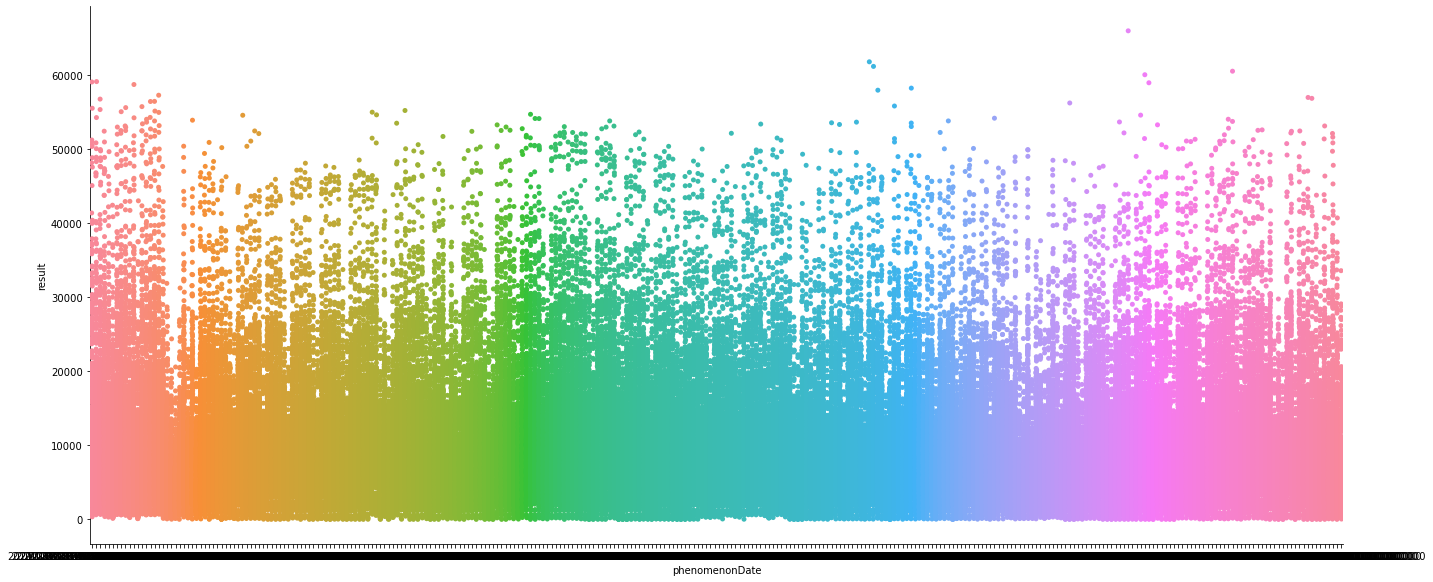

In [18]:
# How much traffic is there for every Zählstelle every day?
sns.catplot(x="phenomenonDate", y="result", data = df_clean_data, height=8, aspect=2.5)

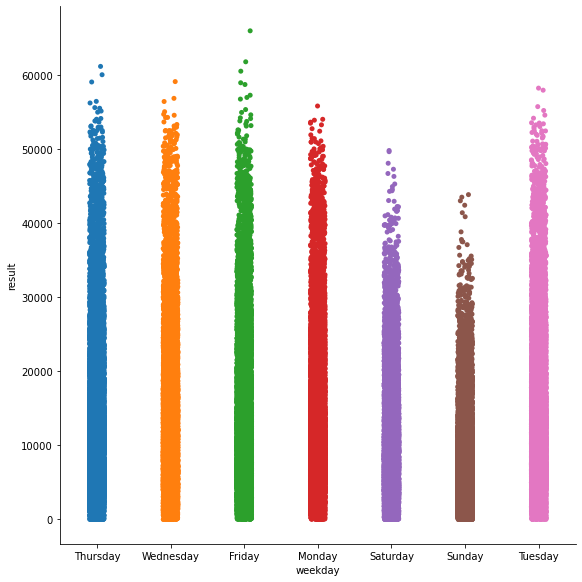

In [19]:
# How much traffic is there for every Zählstelle every day?/ measured per weekday
sns.catplot(x="weekday", y="result", data = df_clean_data, height=8)

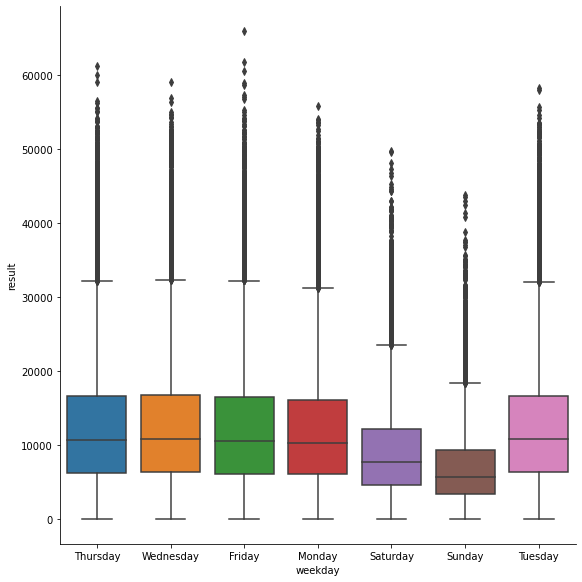

In [20]:
# Another way for visualiszation is using a boxplot. 
sns.catplot(x="weekday", y="result", kind="box", data=df_clean_data, height = 8)

In [21]:
# Calculating the average of each weekday
df_clean_data_mean=df_clean_data.groupby(['weekday']).mean()



In [22]:
df_clean_data_mean

,@iot.id,result,id,lat,long
weekday,,,,,
Friday,1.003265e+08,12604.928406,13912.948716,53.574197,10.005491
Monday,9.724898e+07,12264.921455,13906.701708,53.574225,10.005427
Saturday,9.709669e+07,9285.689329,13904.851994,53.574264,10.005512
Sunday,9.654708e+07,7138.022265,13903.779267,53.574258,10.005472
Thursday,9.951654e+07,12683.041739,13912.202866,53.574206,10.005350
Tuesday,9.784302e+07,12757.955814,13907.137746,53.574171,10.005297
Wednesday,9.875889e+07,12814.174045,13910.987266,53.574220,10.005419


In [23]:
df_clean_data_mean.reset_index(level=0, inplace=True)

In [24]:
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"]

<AxesSubplot:xlabel='weekday', ylabel='result'>

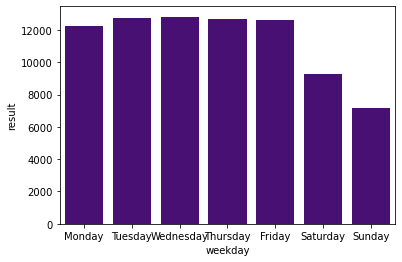

In [25]:
sns.barplot(x="weekday", y="result", data=df_clean_data_mean, order=order, color = 'indigo')

In [26]:
# Convert single digit weeknumbers to 2-digit weeknumbers (e.g "5" to "05")
# Weeknumbers

df_clean_data["Weeknumber"] = df_clean_data["phenomenonDate"].apply(lambda x: x.isocalendar()[1])
df_clean_data["yearnumber"] = df_clean_data["phenomenonDate"].apply(lambda x: x.isocalendar()[0])

In [27]:
def convert_weekno(num_weeknumber):
    if len(str(num_weeknumber)) == 1:
        Weeknumber_clean = '0'+str(num_weeknumber)
    else:
        Weeknumber_clean = str(num_weeknumber)
    return(Weeknumber_clean)

df_clean_data["Weeknumberstring"] = df_clean_data["Weeknumber"].apply(lambda x: convert_weekno(x))

In [28]:
df_clean_data["yearnumber"]=df_clean_data["yearnumber"].astype(object)

In [29]:
# Combine year + weeknumber
df_clean_data["Week in year"] = df_clean_data["yearnumber"].map(str)+df_clean_data["Weeknumberstring"].map(str)

In [30]:
df_clean_data["Week in year"]

0         202132
1         202132
2         202132
3         202133
4         202132
           ...  
117221    202130
117222    202130
117223    202131
117224    202131
117225    202131
Name: Week in year, Length: 117005, dtype: object

In [31]:
df_clean_data.dtypes

@iot.id                      int64
phenomenonDate      datetime64[ns]
result                       int64
id                           int64
lat                        float64
long                       float64
weekday                     object
Weeknumber                   int64
yearnumber                  object
Weeknumberstring            object
Week in year                object
dtype: object

In [32]:
df_clean_data["Week in year"]=df_clean_data["Week in year"].astype(int)

In [33]:
#for visualization: only keep the dates for which we also have bike data
df_clean_data_short = df_clean_data[df_clean_data['Week in year']>=202044]
df_clean_data_short = df_clean_data_short[df_clean_data_short['Week in year']<=202132]

In [34]:
#add column "season": 
#autumn (22.9.-20.12.), 202044 - 202051
# winter (21.12. - 19.3.), 202052-202111
#spring (20.3. - 20.6.),202112-202124  
#summer (21.6.-21.9.), 202125-32 

df_clean_data_short["Season"] = "NA"
df_clean_data_short.loc[df_clean_data_short["Week in year"] > 202043, "Season"] = "autumn"
df_clean_data_short.loc[df_clean_data_short["Week in year"] > 202051, "Season"] = "winter"
df_clean_data_short.loc[df_clean_data_short["Week in year"] > 202111, "Season"] = "spring"
df_clean_data_short.loc[df_clean_data_short["Week in year"] > 202124, "Season"] = "summer"

In [35]:
df_clean_data_short = df_clean_data_short.sort_values(by = "phenomenonDate")

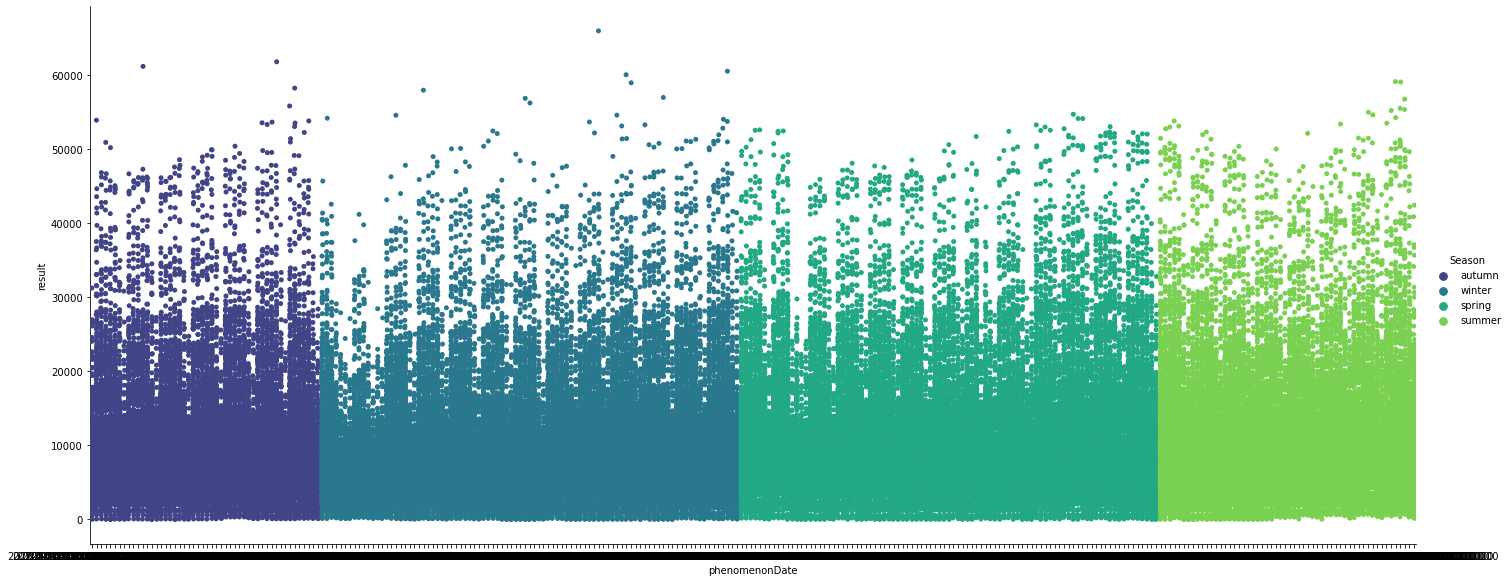

In [36]:
sns.catplot(x="phenomenonDate", y="result",hue = "Season", data = df_clean_data_short, height=8, aspect=2.5,palette="viridis") 
          

In [37]:
#Create dataset only for summer and winter for geo visualization
mask_w = (df_clean_data_short["Season"] == "winter")
df_data_winter = df_clean_data_short.loc[mask_w]

mask_s = (df_clean_data_short["Season"] == "summer")
df_data_summer = df_clean_data_short.loc[mask_s]

#save in csv format
df_data_winter.to_csv(r'C:\Users\Maren\Desktop\TechLabs\hh_techlabs_group12\hh_techlabs_group12\cardata_winter.csv',index=False)
df_data_summer.to_csv(r'C:\Users\Maren\Desktop\TechLabs\hh_techlabs_group12\hh_techlabs_group12\cardata_summer.csv',index=False)

In [38]:
df_data_winter

,@iot.id,phenomenonDate,result,id,lat,long,weekday,Weeknumber,yearnumber,Weeknumberstring,Week in year,Season
55131,53659711,2020-12-21,2791,14016,53.645180,9.908572,Monday,52,2020,52,202052,winter
21455,53660211,2020-12-21,6437,13788,53.620804,9.908441,Monday,52,2020,52,202052,winter
50933,53660308,2020-12-21,16034,12940,53.563027,9.976414,Monday,52,2020,52,202052,winter
46933,53659828,2020-12-21,13621,14276,53.559538,9.948676,Monday,52,2020,52,202052,winter
91950,53660091,2020-12-21,5067,13460,53.585004,10.120146,Monday,52,2020,52,202052,winter
...,...,...,...,...,...,...,...,...,...,...,...,...
33894,63792718,2021-03-21,2713,14040,53.606159,10.167711,Sunday,11,2021,11,202111,winter
50432,63791605,2021-03-21,34904,13560,53.584035,9.933559,Sunday,11,2021,11,202111,winter
17234,63794578,2021-03-21,13284,14288,53.557939,9.949636,Sunday,11,2021,11,202111,winter
54296,63796359,2021-03-21,3897,14328,53.558652,9.963919,Sunday,11,2021,11,202111,winter


In [39]:
df_data_summer

,@iot.id,phenomenonDate,result,id,lat,long,weekday,Weeknumber,yearnumber,Weeknumberstring,Week in year,Season
58249,157259062,2021-06-21,11733,13544,53.617003,9.907150,Monday,25,2021,25,202125,summer
104960,157269764,2021-06-21,6302,14784,53.629820,10.026333,Monday,25,2021,25,202125,summer
92137,157258573,2021-06-21,4482,13460,53.585004,10.120146,Monday,25,2021,25,202125,summer
113662,157269020,2021-06-21,14386,14696,53.559536,9.948978,Monday,25,2021,25,202125,summer
61249,157263190,2021-06-21,7718,14024,53.643959,9.928332,Monday,25,2021,25,202125,summer
...,...,...,...,...,...,...,...,...,...,...,...,...
68372,222445326,2021-08-15,7425,13832,53.598712,10.031230,Sunday,32,2021,32,202132,summer
68672,222445327,2021-08-15,18767,13836,53.600057,10.027394,Sunday,32,2021,32,202132,summer
9814,222445076,2021-08-15,15098,13792,53.606193,10.039332,Sunday,32,2021,32,202132,summer
67549,222440136,2021-08-15,11959,13020,53.653545,10.105742,Sunday,32,2021,32,202132,summer


In [40]:
#Calculating the average of each week:
df_clean_data_weekmean=df_clean_data.groupby(['Week in year']).mean()


In [41]:
df_clean_data_weekmean.reset_index(level=0, inplace=True)

In [42]:
columns = ['Week in year','result']

df_clean_data_weekmean=df_clean_data_weekmean[columns]

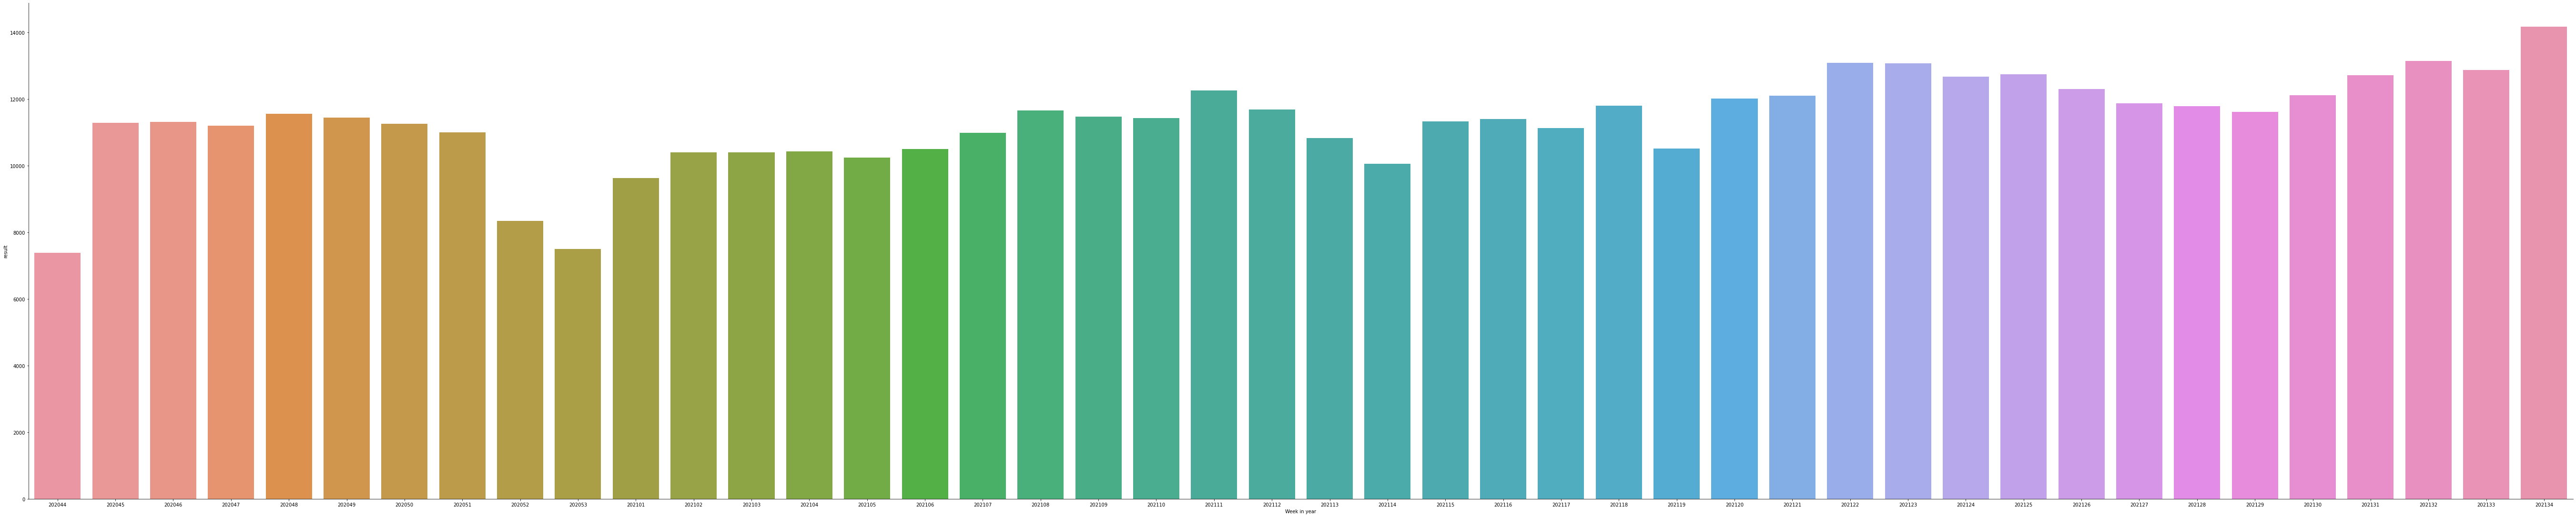

In [43]:
sns.catplot(x="Week in year", y="result", data=df_clean_data_weekmean, height=15, aspect=5, kind = "bar")

In [44]:
##---> rising trend (due to fewer Corona restrictions?)

In [45]:
#show weeks with lowest measured traffic
df_clean_data_weekmean.nsmallest(10, 'result')

,Week in year,result
0,202044,7384.041885
9,202053,7501.512649
8,202052,8343.761536
10,202101,9629.059868
23,202114,10054.723404
14,202105,10238.509394
11,202102,10398.070738
12,202103,10402.994792
13,202104,10434.721628
15,202106,10496.640172


In [46]:
#Explanation lowest traffic weeks
# 2020-44 - (26.10.-1.11.)All saint´s day, Halloween
# 2020-53 - Christmas
# 2020-52 - Christmas
# 2021-01 - New year
# 2021-14 - (05.04. - 11.04.) Easter week
#....

In [47]:
#show weeks with largest measured traffic
df_clean_data_weekmean.nlargest(10, 'result')

,Week in year,result
43,202134,14174.709450
41,202132,13140.697004
31,202122,13081.550583
32,202123,13072.416792
42,202133,12869.182745
34,202125,12745.724676
40,202131,12713.942519
33,202124,12679.415764
35,202126,12308.393468
20,202111,12254.026609


In [48]:
#save in csv format
df_clean_data_weekmean.to_csv(r'C:\Users\Maren\Desktop\TechLabs\hh_techlabs_group12\hh_techlabs_group12\carmean.csv',index=False)